In [1]:
# Load Libraries

import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
pd.options.display.max_rows =999

In [2]:
# Read in the dataset

df = pd.read_csv("thyroidDF.csv")

In [3]:
# Check to see the first few rows of the dataset

df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


### From the documentation of the dataset, '-' is used to denote subjects without a disease related to thyroid

In [4]:
df.target.unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [5]:
# representing our target variable with number

df['target'] = df['target'].apply(lambda x: 0 if x=='-' else 1)

In [6]:
# Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

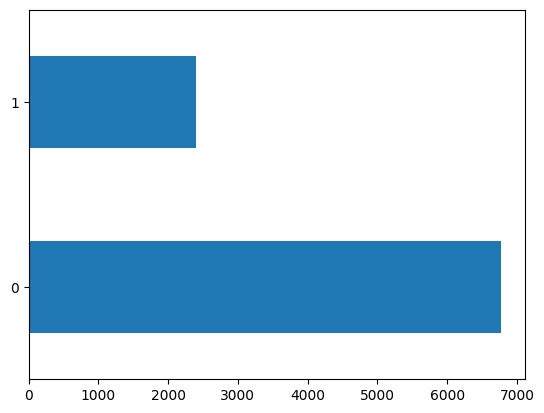

In [7]:
# Check the class distribution of the datset

df['target'].value_counts().plot(kind='barh');

In [8]:
# Mapping sex to numbers

df['sex'] = df['sex'].map({'M':1,'F':0})

In [9]:
# Mapping other categorical variables to numbers

for i in df.columns:
    if (df[i].nunique()==2) & (df[i].dtype=='object'):
        df[i] = df[i].apply(lambda x: 1 if x == 't' else 0)
        

df['referral_source'] = df['referral_source'].map({'SVI':1, 'SVHC':2, 
                                                   'STMW':3, 'SVHD':4, 'WEST':5,'other':6})

In [10]:
# Splitting our data into input and output variables

y = df.target
x= df.drop(columns=['target','patient_id'], axis=1)

In [11]:
# Splitting our data into training and testing set

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=42, random_state=42)

In [12]:
# Defining the pipeline with KNNImputer and RandomForestClassifier

pipe = make_pipeline(KNNImputer(),RandomForestClassifier())

In [13]:
# Fitting the pipeline

pipe.fit(x_train, y_train)

Pipeline(steps=[('knnimputer', KNNImputer()),
                ('randomforestclassifier', RandomForestClassifier())])

In [14]:
# Evaluating the performance of the pipeline on the training set

pipe.score(x_train,y_train)

1.0

In [15]:
# Evaluating the performance of the pipeline on the testing set

pipe.score(x_test,y_test)

0.9285714285714286

# Perform class balamcing

In [16]:
pipe_sm = make_pipeline(KNNImputer(),SMOTE(),RandomForestClassifier())

In [17]:
pipe_sm.fit(x_train, y_train)

Pipeline(steps=[('knnimputer', KNNImputer()), ('smote', SMOTE()),
                ('randomforestclassifier', RandomForestClassifier())])

In [18]:
# Evaluating the performance of the pipeline on the training set

pipe_sm.score(x_train,y_train)

1.0

In [20]:
# Evaluating the performance of the pipeline on the testing set

pipe_sm.score(x_test,y_test)

0.9523809523809523